# Predictive Modeling for Home Renovations: Enhancing Property Value through Data-Driven Insights

Please fill out:
* Student name: Jacinta Wanjiru Mukii
* Student pace: Full time
* Scheduled project review date/time: 09/07/2023 
* Instructor name: Winnie Anyoso



## Project Overview

For this project, I have used  linear regression modeling to analyze house sales in a northwestern 
county and provide insights on house prices so as to help stakeholders understand the market dynamic and 
factors affecting housing values.

## Business Problem

The business problem at hand revolves around predicting house prices based on various housing features in the kc housing dataset. This problem is of great significance to a wide range of stakeholders, including homeowners, sellers, real estate agencies, and property developers. My task is to develop a predictive model using the provided kc housing dataset to provide homeowners with valuable advice on how home renovations can potentially increase the estimated value of their properties and by what magnitude. The objective is to offer stakeholders insights into the key factors that impact house prices, such as location, size, condition, amenities, and the number of rooms, among others.

The creation of the predictive model will bring about several benefits, including:

1. Accurate pricing of assets: The model will enable stakeholders to accurately determine the value of their properties based on the identified housing features. This will facilitate fair and informed pricing strategies.

2. Informed investment decisions: The predictive model will assist stakeholders in making well-informed investment decisions related to real estate. By understanding the factors that influence house prices, stakeholders can allocate their resources effectively and identify investment opportunities with potential for higher returns.

3. Market trend insights: The predictive model will provide stakeholders with a deeper understanding of the prevailing market trends. By analyzing the relationships between housing features and prices, stakeholders can identify emerging patterns and adapt their strategies accordingly.

Overall, the development of the predictive model will empower stakeholders to make data-driven decisions, optimize their investments, and stay ahead in the dynamic real estate market.

### Main objective

  The main objective is to offer homeowners expert guidance on leveraging home renovations to enhance the estimated value of their properties. This objective seeks to empower homeowners with valuable insights regarding the potential increase in value resulting from specific renovation projects. By providing comprehensive advice, the goal is to enable homeowners to make well- informed decisions about their home renovations, effectively allocate their resources, and potentially maximize their return on investment when selling their homes.


### Specific objectives

   - Develop a simple linear regression model to assess the relationship between the grade/reviews of renovated houses and their prices, determining whether higher grades/reviews are associated with higher prices.

   - Build a multiple linear regression model to investigate the relationship between the top 5 renovation features in the housing dataset (such as location, size, condition, amenities, and number of rooms) and housing prices, aiming to understand how these features collectively influence the prices.

   - Evaluate the performance of a comprehensive regression model that analyzes the relationship between all available renovation features in the housing dataset and  housing prices, with the goal of accurately predicting prices based on these features. 

### Experimental Design

   - **Data Collection** - This involves loading and inspecting the King County House Sales dataset in northwestern county.The dataset contains both categorical and numerical data.
    
   - **Data Preprocessing** - In this section, I have done the following  : Dropping columns from the dataset, checking and removing duplicates in the dataset, detecting and dealing with null values in the dataset, separating values from words in a column.
     
   - **Exploratory Data Analysis** - I have summarized and analyzed datasets to gain insights, identify patterns and understand the  underlying structire of the data using univariate, bivariate analysis and multivariate analysis.
     
   - **Feature selection** - I performed multicollinearity between variables and splitting of data.   
    
   - **Data modelling and model performance evaluation** - Modelling and evaluating the performance of  linear regressions models.
    
   - **Model interpretation** -I have checked the best performing model using two metrics: r squared and mean squared  error(mse).
      
   - **Conclusions and Recommendations** - based on the model interpretation.   



### Importing Libraries

In [2]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
import scipy.stats as stats
import re
import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_classif

In [3]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


### 1. DATA COLLECTION

#### 1.1. Loading the dataset

In [5]:
#Loading the data into a pandas dataframe
houses_df =  pd.read_csv("data/kc_house_data.csv")

#### 1.2. Inspecting the dataset

In [6]:
#Displaying the dataset
houses_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [7]:
#Making a copy of the dataset
df_houses = houses_df.copy()

In [8]:
#Displaying the first few rows
df_houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [9]:
#Displaying the last few rows
df_houses.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,NO,NONE,...,7 Average,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [10]:
#Displaying a numeric summary of the dataset
df_houses.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


This involves loading and inspecting the King County House Sales dataset in northwestern county.The dataset contains both categorical and numerical data. I has 21597 rows and 21 columns.

### 2. DATA PREPROCESSING

1. Dropping columns from the dataset 

2. Checking and removing duplicates in the dataset

3. Detecting and dealing with null values in the dataset

4. Separating values from words in a column


#### 2.1. Dropping columns

In [11]:
#Dropping some of the columns
df_houses = df_houses.drop(["date", "view", "sqft_above", "sqft_basement", "yr_renovated", "zipcode", "lat", "long", "sqft_living15","sqft_lot15"], axis = 1)

In [12]:
#Checking the data type for each column
df_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  float64
 7   waterfront   19221 non-null  object 
 8   condition    21597 non-null  object 
 9   grade        21597 non-null  object 
 10  yr_built     21597 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.8+ MB


There are 21597 rows and 11 columns the dataset after dropping the columns.

The data types are float, objects and integers.

Waterfront has 2376 null values.

In [13]:
df_houses.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987


#### 2.2. Checking for duplicates

In [14]:
#Checking for duplicated in the dataset
df_houses.duplicated().any()

True

The dataset contains duplicates

In [15]:
#Dropping the duplicates contained in the id column
df_houses = df_houses.drop_duplicates(subset = 'id', keep = 'first')

In [16]:
#Confirming that the duplicated have been dropped
df_houses.duplicated().any()

False

#### 2.3. Detecting and dealing with null values

In [17]:
#Checking for null values in the dataset
df_houses.isna().sum()

id                0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2353
condition         0
grade             0
yr_built          0
dtype: int64

Waterfront is the only column with null values.

In [18]:
#investigate some of the unique values inside of the waterfront column.  
df_houses['waterfront'].unique()

array([nan, 'NO', 'YES'], dtype=object)

In [19]:
df_houses['waterfront']

0        NaN
1         NO
2         NO
3         NO
4         NO
        ... 
21592     NO
21593     NO
21594     NO
21595    NaN
21596     NO
Name: waterfront, Length: 21420, dtype: object

In [20]:
#Filling null values in the waterfront column
df_houses['waterfront'] = df_houses['waterfront'].fillna('NO')

In [21]:
#Confirming the null values have been dropped
df_houses.isna().sum()

id             0
price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
condition      0
grade          0
yr_built       0
dtype: int64

In [22]:
#Valuecounts of the dataset
df_houses['waterfront'].value_counts()

waterfront
NO     21274
YES      146
Name: count, dtype: int64

In [23]:
#Displaying a summary info of the dataframe
df_houses.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21420 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21420 non-null  int64  
 1   price        21420 non-null  float64
 2   bedrooms     21420 non-null  int64  
 3   bathrooms    21420 non-null  float64
 4   sqft_living  21420 non-null  int64  
 5   sqft_lot     21420 non-null  int64  
 6   floors       21420 non-null  float64
 7   waterfront   21420 non-null  object 
 8   condition    21420 non-null  object 
 9   grade        21420 non-null  object 
 10  yr_built     21420 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 2.0+ MB


The dataset has non null values in the dataset.

The rows and columns are 21420 and  11  respectively.

In [24]:
#Displaying a numeric summary of the dataset
df_houses.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built
count,2.142000e+04,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,21420.000000
mean,4.580940e+09,5.407393e+05,3.373950,2.118429,2083.132633,1.512804e+04,1.495985,1971.092997
std,2.876761e+09,3.679311e+05,0.925405,0.768720,918.808412,4.153080e+04,0.540081,29.387141
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1900.000000
25%,2.123537e+09,3.225000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1952.000000
50%,3.904921e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,1975.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,1997.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,2015.000000


#### 2.4. To split values from words in a column

In [25]:
#Displaying the grade column
df_houses['grade'].head()

0        7 Average
1        7 Average
2    6 Low Average
3        7 Average
4           8 Good
Name: grade, dtype: object

In [26]:
# Create a sample DataFrame
data = pd.DataFrame({
    'Column1': df_houses['grade']
})

# Separate values from words using whitespace as the delimiter
data[['Values', 'Words']] = data['Column1'].str.split(' ', n=1, expand=True)

# Print the updated DataFrame
print(data)

             Column1 Values        Words
0          7 Average      7      Average
1          7 Average      7      Average
2      6 Low Average      6  Low Average
3          7 Average      7      Average
4             8 Good      8         Good
...              ...    ...          ...
21592         8 Good      8         Good
21593         8 Good      8         Good
21594      7 Average      7      Average
21595         8 Good      8         Good
21596      7 Average      7      Average

[21420 rows x 3 columns]


In [27]:
df_houses['grade'] = data['Values']

# Drop the unnecessary columns
data = data.drop(['Values', 'Words'], axis=1)

# Print the updated DataFrame with only the desired column
print(data)

             Column1
0          7 Average
1          7 Average
2      6 Low Average
3          7 Average
4             8 Good
...              ...
21592         8 Good
21593         8 Good
21594      7 Average
21595         8 Good
21596      7 Average

[21420 rows x 1 columns]


In [28]:
df_houses.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NO,Average,7,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,Average,7,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,Average,6,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,Average,8,1987


In [29]:
df_houses["grade"].dtype

dtype('O')

### 3. EXPLORATION DATA ANALYSIS

I have summarized and analyzed datasets to gain insights, identify patterns and understand the underlying structire of the data.

Two types of techniques/ analysis  used in this EDA:

   1. Univariate analysis
       - Numeric data
          - removal of outliers
       - Categorical data
       
   2. Bivariate analysis
       -  Numerical data
       
       - Categorical data 
       
I have analysed the datasets using the following plots: histograms, boxplots,and scatter plots. 

       

### 3.1. Univariate analysis

Analysis will involve the relationship between individual variables in the dataset.

In [30]:
# Making a list of numeric columns
Numeric = df_houses[['price','bedrooms','bathrooms','sqft_living', 'sqft_lot','floors','yr_built', 'grade']]
Numeric

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,grade
0,221900.0,3,1.00,1180,5650,1.0,1955,7
1,538000.0,3,2.25,2570,7242,2.0,1951,7
2,180000.0,2,1.00,770,10000,1.0,1933,6
3,604000.0,4,3.00,1960,5000,1.0,1965,7
4,510000.0,3,2.00,1680,8080,1.0,1987,8
...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,2009,8
21593,400000.0,4,2.50,2310,5813,2.0,2014,8
21594,402101.0,2,0.75,1020,1350,2.0,2009,7
21595,400000.0,3,2.50,1600,2388,2.0,2004,8


In [31]:
for column in Numeric:
    df_houses[column] = pd.to_numeric(df_houses[column])

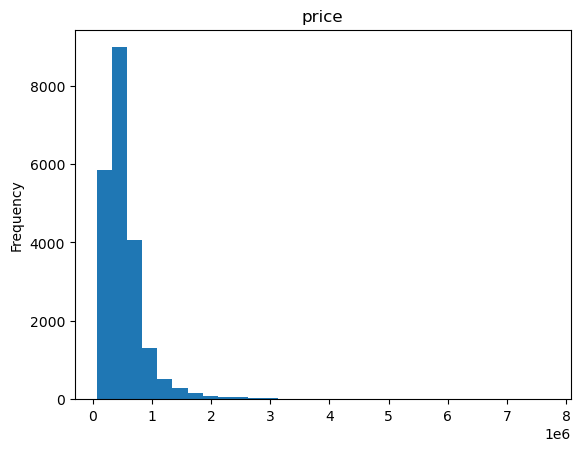

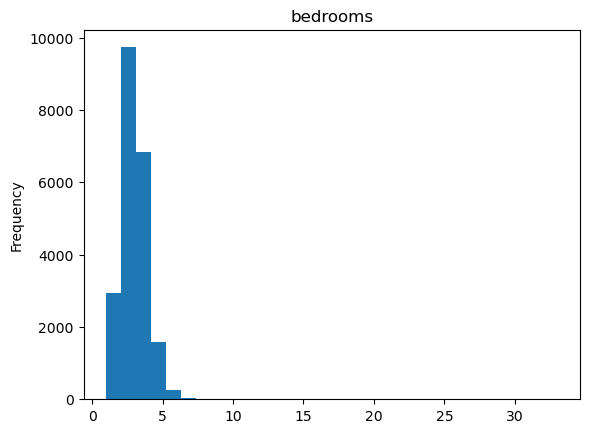

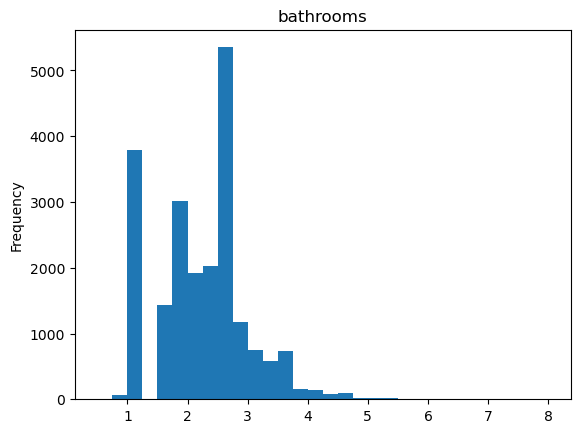

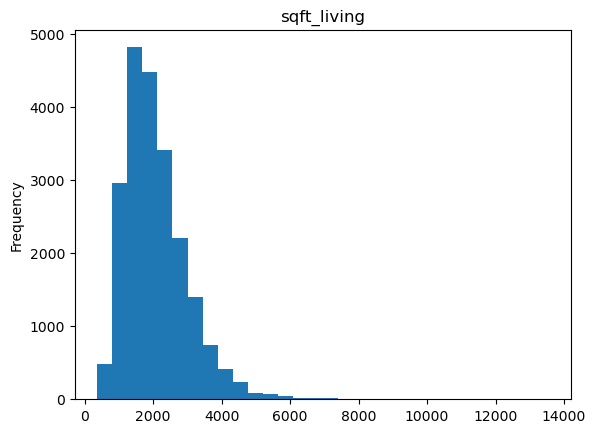

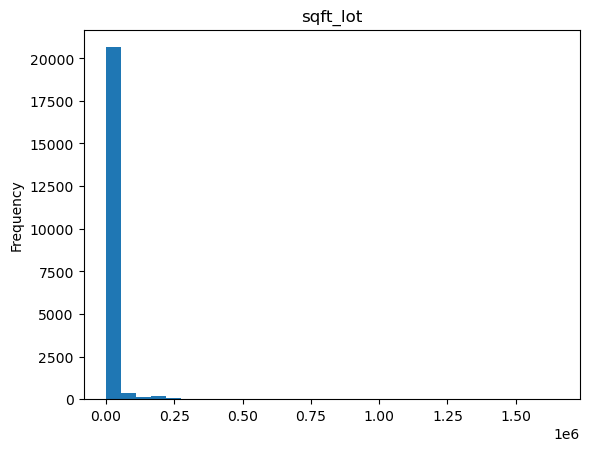

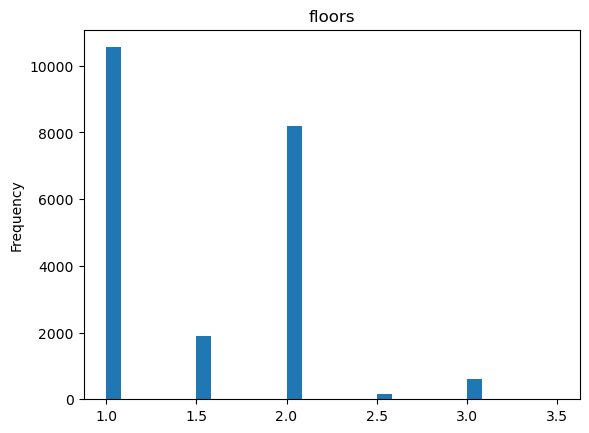

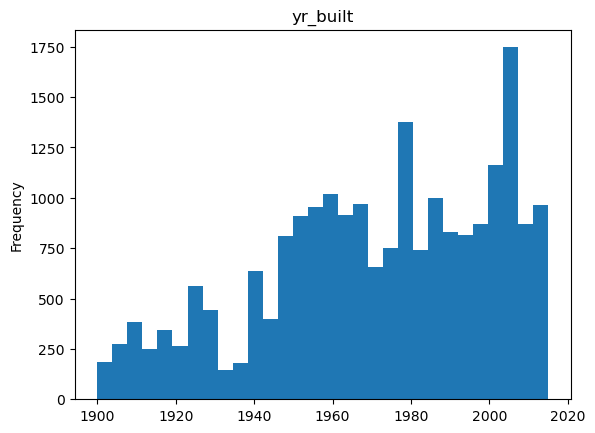

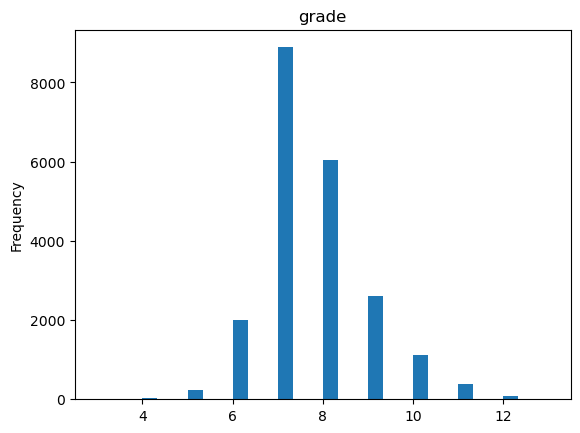

In [32]:
#Histogram plots for numeric values for individual variables
for column in Numeric:
    fig, ax = plt.subplots()
    df_houses[column].plot(kind = 'hist', bins = 30, title = column)
    plt.show()

#### 3.1.1. Checking for Outliers

In [33]:
for column in Numeric:
    df_houses[column] = pd.to_numeric(df_houses[column])

# Print the updated DataFrame
print(df_houses.head())

           id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors   
0  7129300520  221900.0         3       1.00         1180      5650     1.0  \
1  6414100192  538000.0         3       2.25         2570      7242     2.0   
2  5631500400  180000.0         2       1.00          770     10000     1.0   
3  2487200875  604000.0         4       3.00         1960      5000     1.0   
4  1954400510  510000.0         3       2.00         1680      8080     1.0   

  waterfront  condition  grade  yr_built  
0         NO    Average      7      1955  
1         NO    Average      7      1951  
2         NO    Average      6      1933  
3         NO  Very Good      7      1965  
4         NO    Average      8      1987  


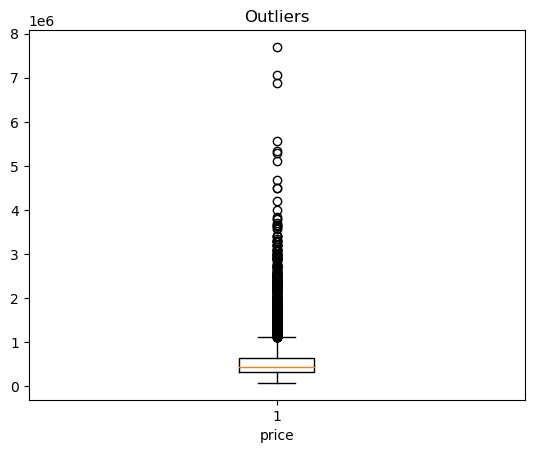

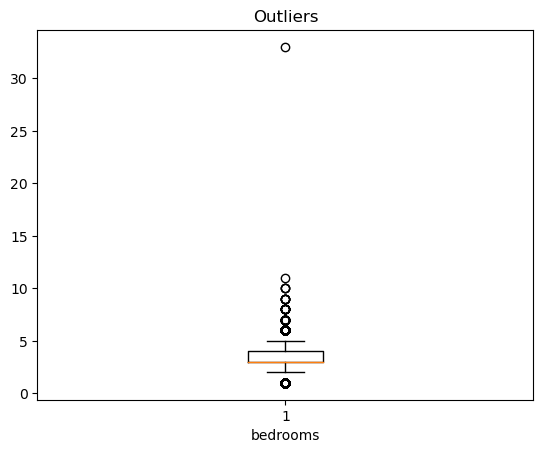

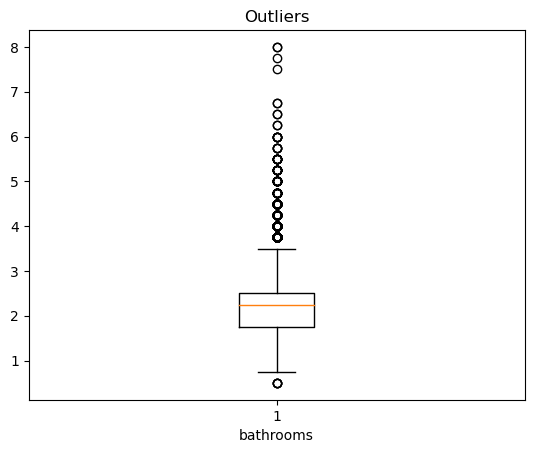

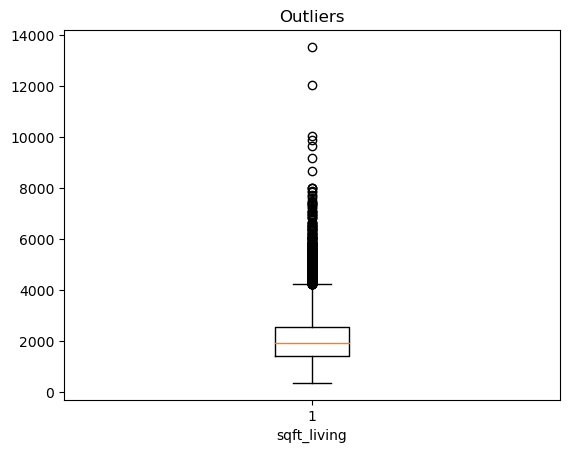

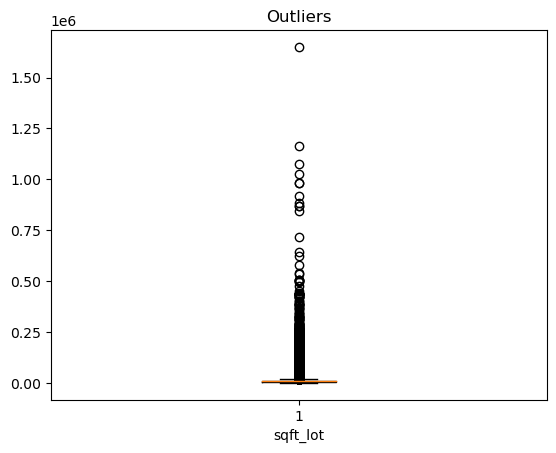

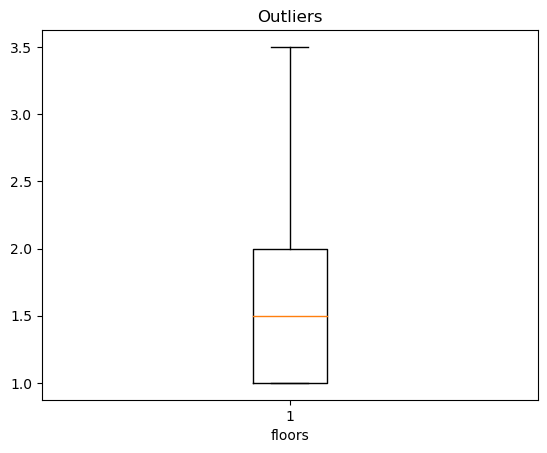

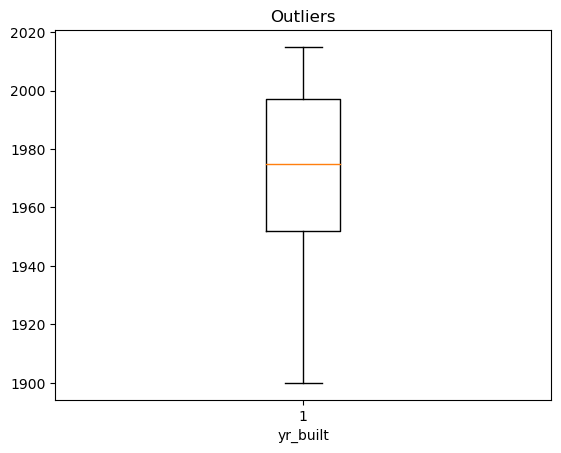

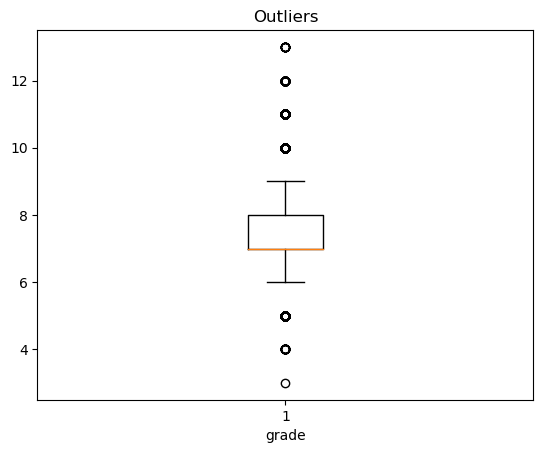

In [34]:
#For loop for boxplot to check for outliers
for column in Numeric:
    plt.figure()
    plt.boxplot(df_houses[column])
    plt.xlabel(column)
    plt.title('Outliers')
    
    #Display the plot
    plt.show()

All the columns have outliers except for yr_built and floors

In [35]:
#Checking for outliers in the bedroom column
df_houses['bedrooms'].value_counts()

bedrooms
3     9731
4     6849
2     2736
5     1586
6      265
1      191
7       38
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

####  3.1.2 Dealing with outliers

In [36]:
#Removing Outliers using standard deviation
def determine_outlier_thresholds_std(Numeric, col_name):
    upper_boundary = Numeric[col_name].mean() + 3 * Numeric[col_name].std()
    lower_boundary = Numeric[col_name].mean() - 3 * Numeric[col_name].std()
    return lower_boundary, upper_boundary

In [37]:
def check_outliers_std(Numeric, col_name):
    lower_boundary, upper_boundary = determine_outlier_thresholds_std(Numeric, col_name)
    if Numeric[(Numeric[col_name] > upper_boundary) | (Numeric[col_name] < lower_boundary)].any(axis=None):
        return True
    else: 
        return False

def replace_with_thresholds_std(Numeric, cols, replace=False):
    from tabulate import tabulate
    data = []
    for col_name in cols:
        if col_name != 'Outcome':
            outliers_ = check_outliers_std(Numeric, col_name)
            count = None
            lower_limit, upper_limit = determine_outlier_thresholds_std(Numeric, col_name)
            if outliers_:
                count = Numeric[(Numeric[col_name] > upper_limit) | (Numeric[col_name] < lower_limit)][col_name].count()
                if replace:
                    if lower_limit < 0:
                        # We don't want to replace with negative values, right!
                        Numeric.loc[(Numeric[col_name] > upper_limit), col_name] = upper_limit
                    else:
                        Numeric.loc[(Numeric[col_name] < lower_limit), col_name] = lower_limit
                        Numeric.loc[(Numeric[col_name] > upper_limit), col_name] = upper_limit
            outliers_status = check_outliers_std(Numeric, col_name)
            data.append([outliers_, outliers_status,count, col_name, lower_limit, upper_limit])
    table = tabulate(data, headers=['Outlier (Previously)','Outliers','Count', 'Column','Lower Limit', 'Upper Limit'], tablefmt='rst', numalign='right')
    print("Removing Outliers using 3 Standard Deviation")
    print(table)

replace_with_thresholds_std(df_houses, Numeric,replace=True)

Removing Outliers using 3 Standard Deviation
======================  ==========  =======  ===========  =============  =============
Outlier (Previously)    Outliers      Count  Column         Lower Limit    Upper Limit
======================  ==========  =======  ===========  =============  =============
True                    True            403  price              -563054    1.64453e+06
True                    True             62  bedrooms          0.597736        6.15016
True                    True            186  bathrooms        -0.187731        4.42459
True                    True            247  sqft_living       -673.293        4839.56
True                    True            342  sqft_lot           -109464         139720
True                    True              7  floors           -0.124258        3.11623
False                   False                yr_built           1882.93        2059.25
True                    True            129  grade              4.14688        11.178

In [38]:
df_houses['bedrooms'].value_counts()

bedrooms
3.000000    9731
4.000000    6849
2.000000    2736
5.000000    1586
6.000000     265
1.000000     191
6.150163      62
Name: count, dtype: int64

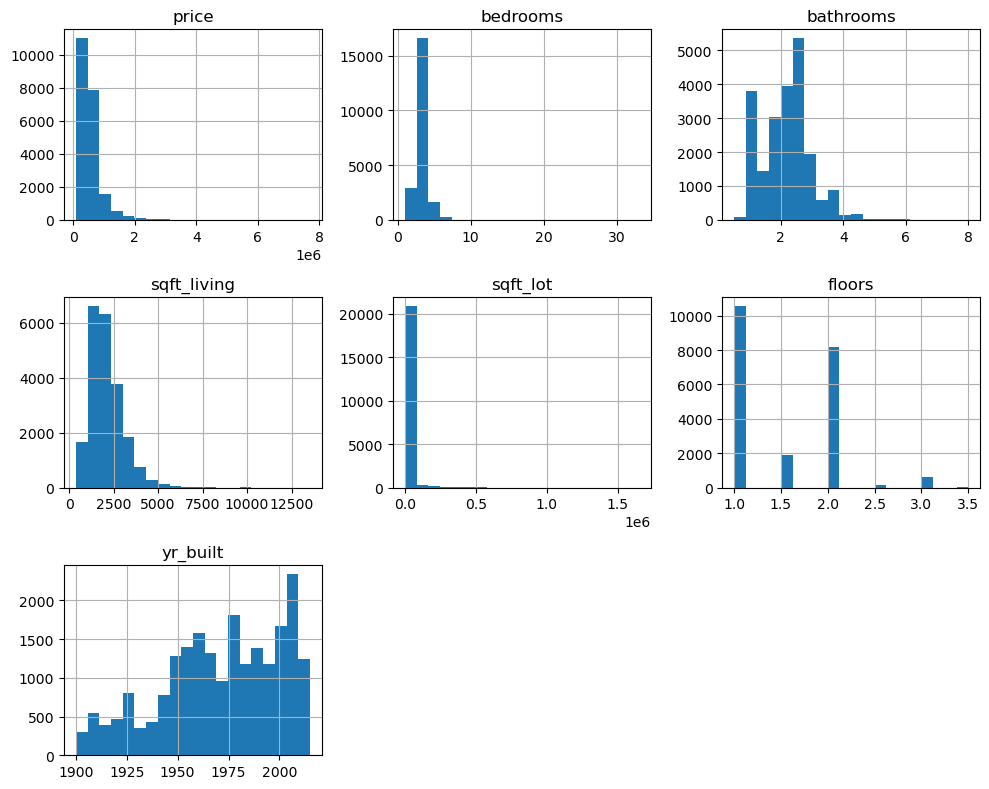

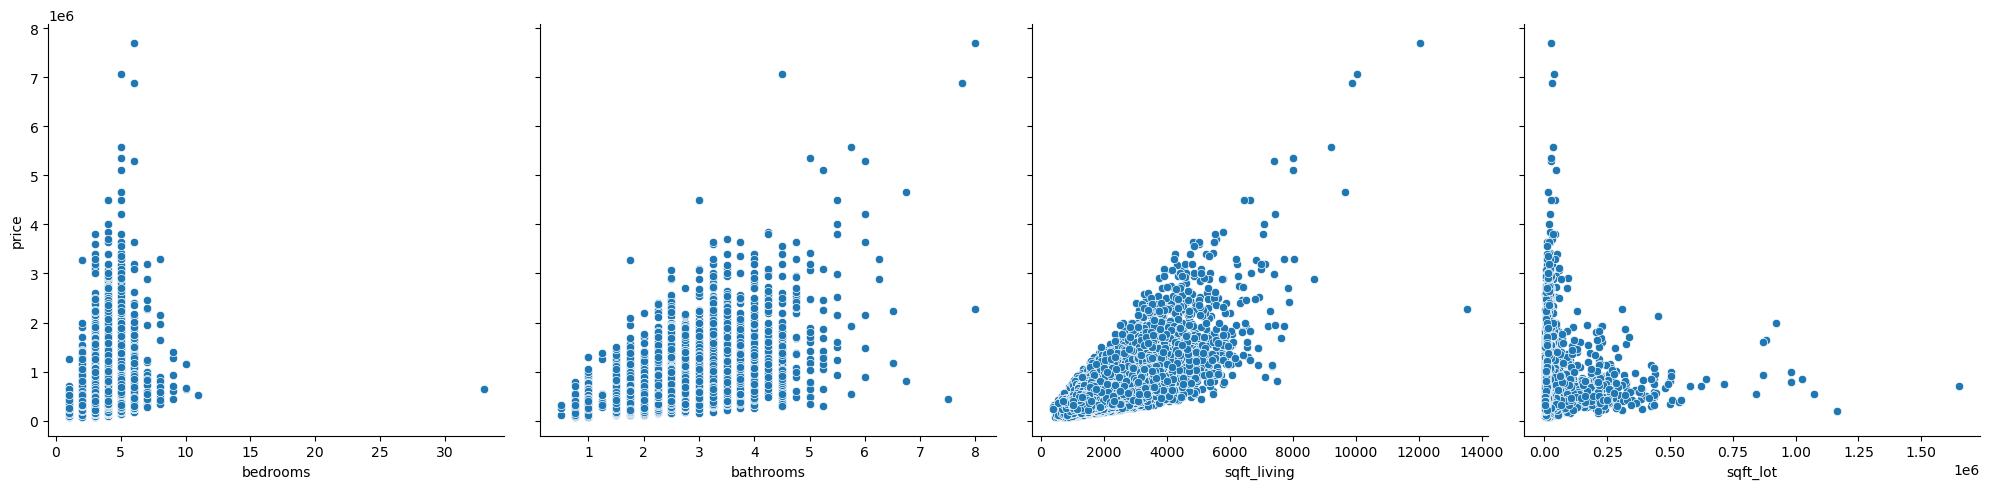

In [39]:
# Plot histograms of the cleaned dataset after removing the outliers
Numeric.hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

# Plot scatterplots of price against other numeric columns
sns.pairplot(Numeric, x_vars=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot'], y_vars='price', height=5)
plt.tight_layout()

In [40]:
#Displaying categorical data columns
categorical = df_houses[['condition','waterfront']]
categorical.head()

,condition,waterfront
0,Average,NO
1,Average,NO
2,Average,NO
3,Very Good,NO
4,Average,NO


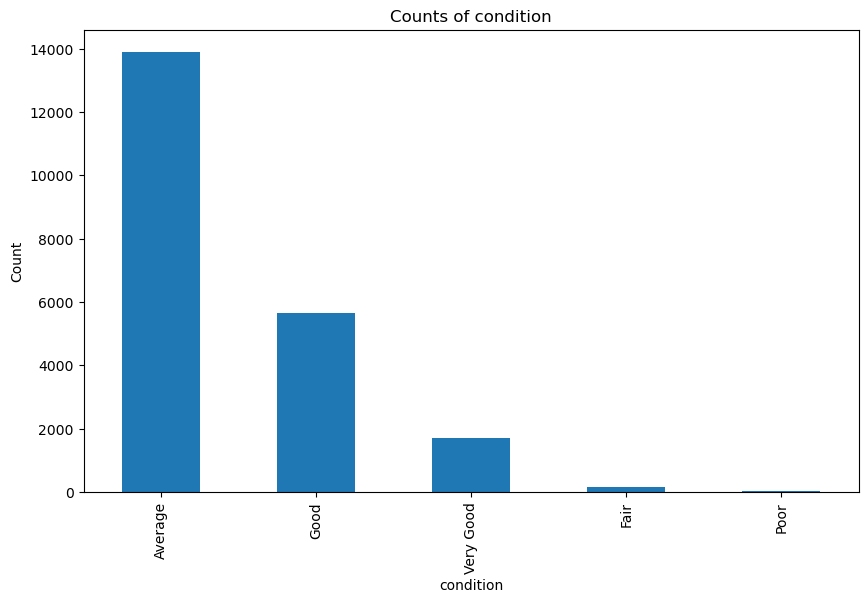

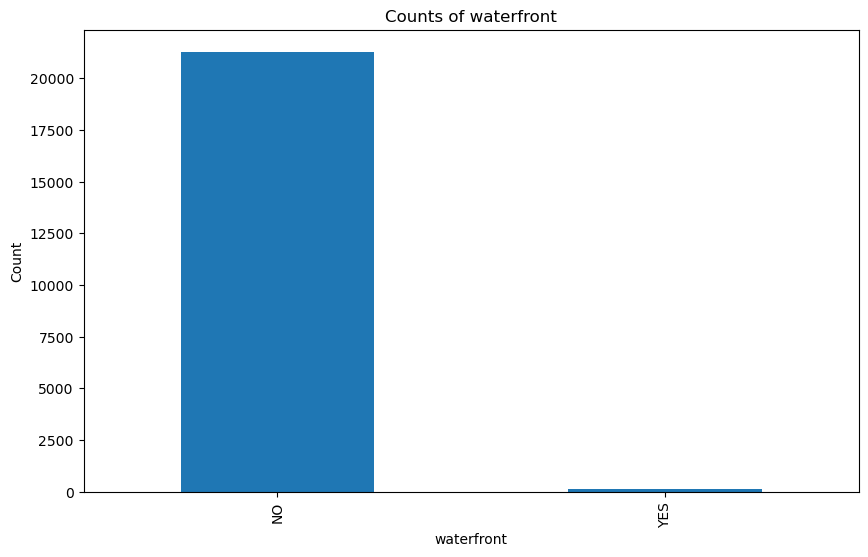

In [41]:
#Plotting categorical data
for column in categorical:
    # Create a bar plot for the current column
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    df_houses[column].value_counts().plot(kind='bar')
    plt.title(f'Counts of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

### 3.2 Bivariate Analysis

In [42]:
#Displaying the numeric columns for the dataset
Numeric = df_houses[['price','bedrooms','bathrooms','sqft_living', 'sqft_lot','floors','yr_built', 'grade']]
Numeric

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,grade
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,1955,7.0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,1951,7.0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,1933,6.0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,1965,7.0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,1987,8.0
...,...,...,...,...,...,...,...,...
21592,360000.0,3.0,2.50,1530.0,1131.0,3.0,2009,8.0
21593,400000.0,4.0,2.50,2310.0,5813.0,2.0,2014,8.0
21594,402101.0,2.0,0.75,1020.0,1350.0,2.0,2009,7.0
21595,400000.0,3.0,2.50,1600.0,2388.0,2.0,2004,8.0


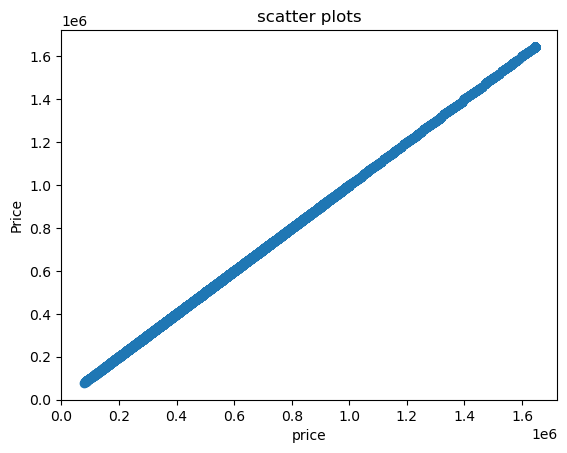

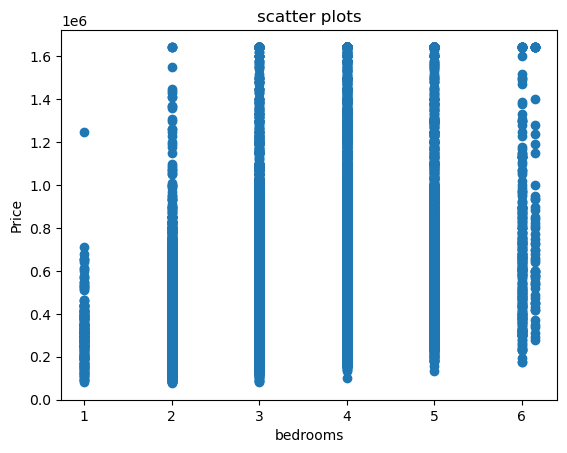

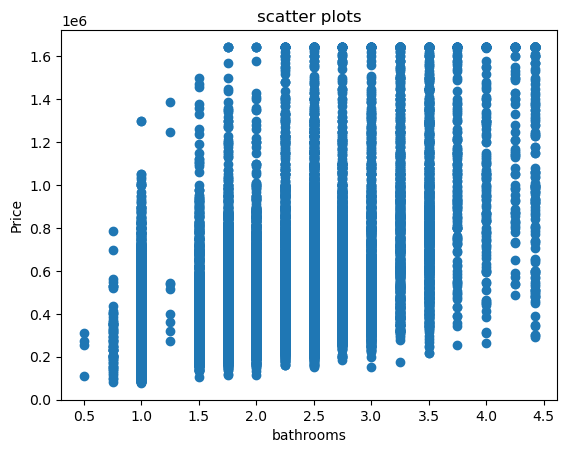

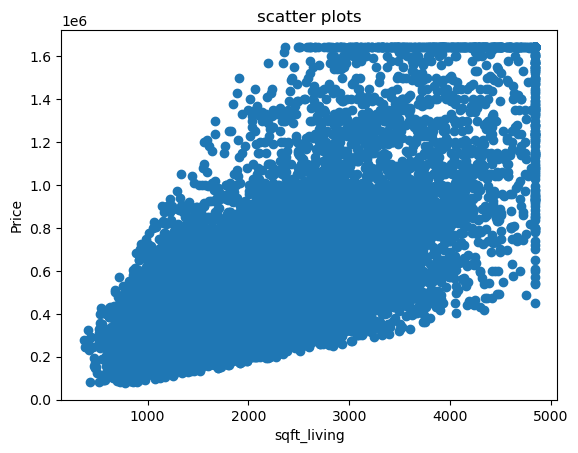

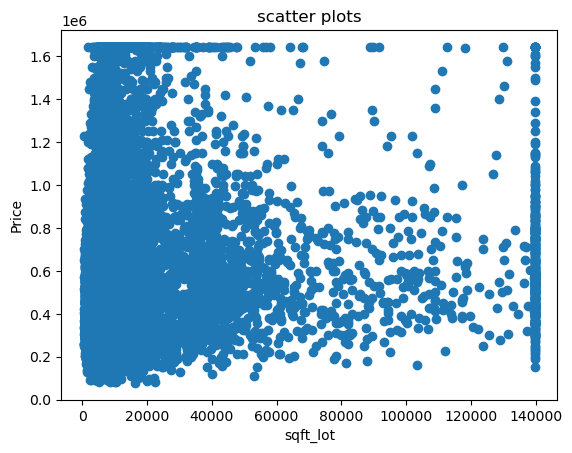

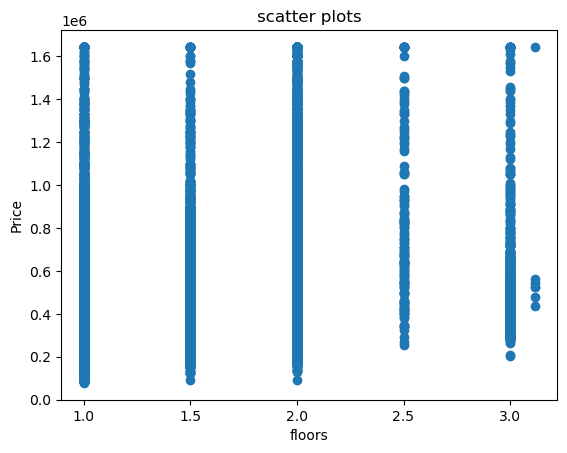

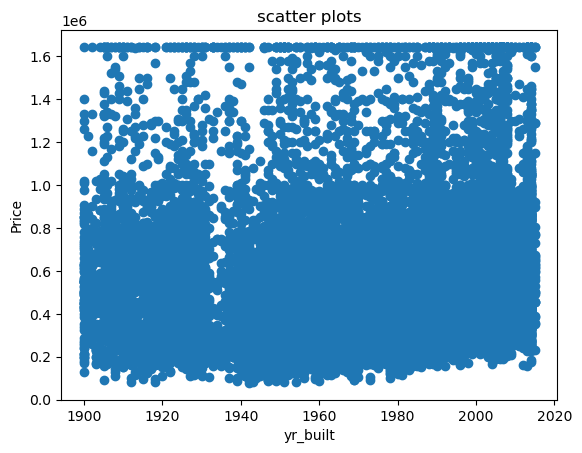

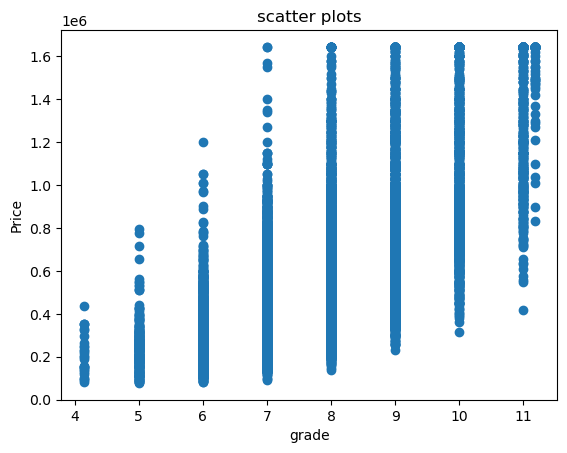

In [43]:
#Displaying scatter plot for each numeric column and the target variable
for column in Numeric:
# plot scatter plots for each item in the numeric list.    
    plt.scatter(df_houses[column], df_houses['price'])
# set labels and title
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.title('scatter plots')
# display the plot.
    plt.show()

Sqft_living is positively correlated with the sale price .

yr_built has no correlation to the price.

Floors, bathrooom and bedrooms columns are discontinuous.

In [44]:
price = df_houses["price"]
price

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21592    360000.0
21593    400000.0
21594    402101.0
21595    400000.0
21596    325000.0
Name: price, Length: 21420, dtype: float64

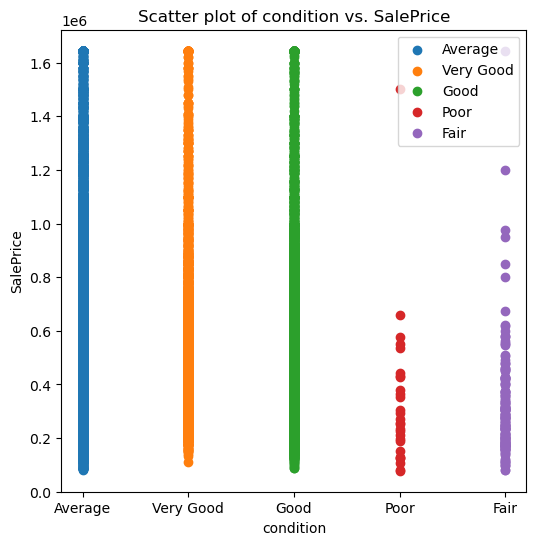

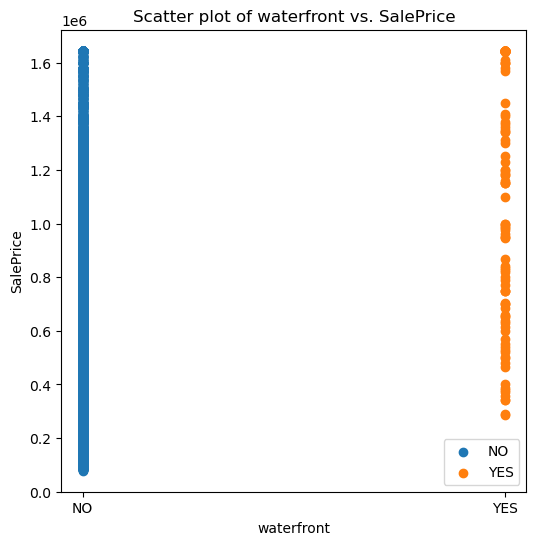

In [45]:
for column in categorical:
    # Create a scatter plot for the current column
    plt.figure(figsize=(6, 6))  # Adjust the figure size as needed
    for category in df_houses[column].unique():
        plt.scatter(df_houses[df_houses[column] == category][column], df_houses[df_houses[column] == category]['price'], label=category)
    plt.title(f'Scatter plot of {column} vs. SalePrice')
    plt.xlabel(column)
    plt.ylabel('SalePrice')
    plt.legend()
    plt.show()

### 4. FEATURE SELECTION

The goal is to identify the most informative and significant features that have a strong relationship with the target variable and can improve the predictive power of the linear regression model.

### One-hot encoding

In [46]:
# Select the columns containing categorical data
categorical_columns = ['condition', 'waterfront'].copy()

# Perform one-hot encoding
encoded_data = pd.get_dummies(df_houses, columns=categorical_columns, drop_first = True)

# Print the encoded data
print(encoded_data.head())

           id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors   
0  7129300520  221900.0       3.0       1.00       1180.0    5650.0     1.0  \
1  6414100192  538000.0       3.0       2.25       2570.0    7242.0     2.0   
2  5631500400  180000.0       2.0       1.00        770.0   10000.0     1.0   
3  2487200875  604000.0       4.0       3.00       1960.0    5000.0     1.0   
4  1954400510  510000.0       3.0       2.00       1680.0    8080.0     1.0   

   grade  yr_built  condition_Fair  condition_Good  condition_Poor   
0    7.0      1955           False           False           False  \
1    7.0      1951           False           False           False   
2    6.0      1933           False           False           False   
3    7.0      1965           False           False           False   
4    8.0      1987           False           False           False   

   condition_Very Good  waterfront_YES  
0                False           False  
1                False

In [47]:
# Displaying the numeric summary of the encoded data
encoded_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,yr_built
count,2.142000e+04,2.142000e+04,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000
mean,4.580940e+09,5.287602e+05,3.368502,2.114261,2071.759467,13001.170334,1.495860,7.658551,1971.092997
std,2.876761e+09,3.000464e+05,0.885228,0.752248,869.307260,21194.212290,0.539660,1.155615,29.387141
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,520.000000,1.000000,4.146878,1900.000000
25%,2.123537e+09,3.225000e+05,3.000000,1.750000,1430.000000,5040.000000,1.000000,7.000000,1952.000000
50%,3.904921e+09,4.500000e+05,3.000000,2.250000,1920.000000,7614.000000,1.500000,7.000000,1975.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,10690.500000,2.000000,8.000000,1997.000000
max,9.900000e+09,1.644533e+06,6.150163,4.424589,4839.557868,139720.428515,3.116228,11.178705,2015.000000


In [48]:
#A summary of the encoded data
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21420 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   21420 non-null  int64  
 1   price                21420 non-null  float64
 2   bedrooms             21420 non-null  float64
 3   bathrooms            21420 non-null  float64
 4   sqft_living          21420 non-null  float64
 5   sqft_lot             21420 non-null  float64
 6   floors               21420 non-null  float64
 7   grade                21420 non-null  float64
 8   yr_built             21420 non-null  int64  
 9   condition_Fair       21420 non-null  bool   
 10  condition_Good       21420 non-null  bool   
 11  condition_Poor       21420 non-null  bool   
 12  condition_Very Good  21420 non-null  bool   
 13  waterfront_YES       21420 non-null  bool   
dtypes: bool(5), float64(7), int64(2)
memory usage: 1.7 MB


The encoded data has 21420 rows and 14 columns in the dataset.

The data has no null variables.

There are 3 data types: bool, float, and integer.

#### 4.1 Multicolinearity

This is to show the correlation between different varibales in the encoded dataset

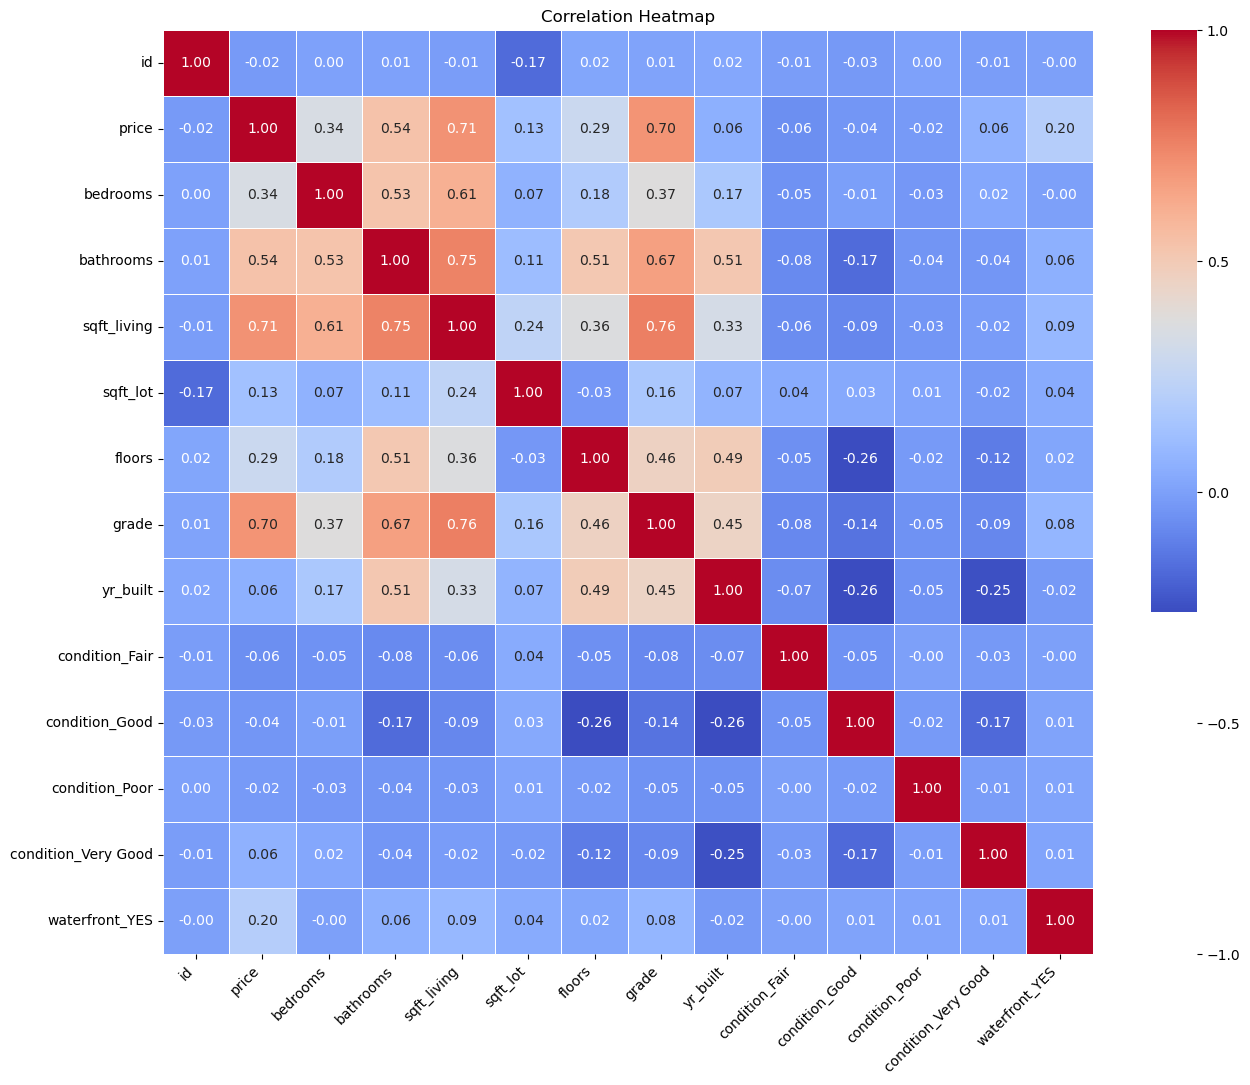

In [49]:
# Compute the correlation matrix
correlation_matrix = encoded_data.corr()

# Set the figure size based on the number of variables
fig, ax = plt.subplots(figsize=(15, 12))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, ax=ax)

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Adjust the colorbar to fit the heatmap (optional)
cbar = ax.collections[0].colorbar
cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

# Set the title for the plot
plt.title('Correlation Heatmap')

# Display the plot
plt.show()

By examining this correlation matrix, you can identify variables that are highly correlated and potentially redundant, or 

variables that show strong relationships and can be considered as important predictors in our analysis.

The light shades show a high correlation between the elements while dark shades show a low correlation between the elements.

The closer the value is to -1 or 1, the stronger the correlation, either negatively or positively.

From this correlation matrix, the variables that are highly correlated with the price, which is our target variable are: bathrooms, sqft_living. 

However bathrooms and sqft_living also show multicolinearity hence will be dropped to avoid issues in the interpretation and estimation of the regression coefficients

In [50]:
# Retrieving the variable pairs from the correlation matrix that have correlations over .75, but less than 1.

df = encoded_data.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df['pairs'] = list(zip(df.level_0, df.level_1))

df.set_index(['pairs'], inplace = True)

df.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df.columns = ['cc']

df.drop_duplicates(inplace=True)

df[(df.cc>.5) & (df.cc<1)]

,cc
pairs,
"(sqft_living, grade)",0.763326
"(bathrooms, sqft_living)",0.753227
"(price, sqft_living)",0.706013
"(grade, price)",0.702911
"(grade, bathrooms)",0.665135
"(sqft_living, bedrooms)",0.609327
"(bathrooms, price)",0.536568
"(bathrooms, bedrooms)",0.529892
"(yr_built, bathrooms)",0.513955


In [51]:
#removing sqft_living, bathrooms, and grade_8 Good from the dataset in order to reduce collinear features.
encoded_data.drop(columns=['sqft_living', 'bathrooms'], inplace = True)

In [52]:
# Confirming that the columns have been dropped
encoded_data.head()

,id,price,bedrooms,sqft_lot,floors,grade,yr_built,condition_Fair,condition_Good,condition_Poor,condition_Very Good,waterfront_YES
0,7129300520,221900.0,3.0,5650.0,1.0,7.0,1955,False,False,False,False,False
1,6414100192,538000.0,3.0,7242.0,2.0,7.0,1951,False,False,False,False,False
2,5631500400,180000.0,2.0,10000.0,1.0,6.0,1933,False,False,False,False,False
3,2487200875,604000.0,4.0,5000.0,1.0,7.0,1965,False,False,False,True,False
4,1954400510,510000.0,3.0,8080.0,1.0,8.0,1987,False,False,False,False,False


In [53]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21420 entries, 0 to 21596
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   21420 non-null  int64  
 1   price                21420 non-null  float64
 2   bedrooms             21420 non-null  float64
 3   sqft_lot             21420 non-null  float64
 4   floors               21420 non-null  float64
 5   grade                21420 non-null  float64
 6   yr_built             21420 non-null  int64  
 7   condition_Fair       21420 non-null  bool   
 8   condition_Good       21420 non-null  bool   
 9   condition_Poor       21420 non-null  bool   
 10  condition_Very Good  21420 non-null  bool   
 11  waterfront_YES       21420 non-null  bool   
dtypes: bool(5), float64(5), int64(2)
memory usage: 1.4 MB


In [54]:
#Using pandas to find the features that are most correlated with price 
encoded_data.corr()['price'].sort_values()

condition_Fair        -0.060764
condition_Good        -0.035921
condition_Poor        -0.023080
id                    -0.020042
yr_built               0.059343
condition_Very Good    0.064057
sqft_lot               0.131238
waterfront_YES         0.199086
floors                 0.285054
bedrooms               0.341215
grade                  0.702911
price                  1.000000
Name: price, dtype: float64

Grade has a high correlatation with the price as it is nearing +1 which is a perfect positive correlation.

#### Normalization

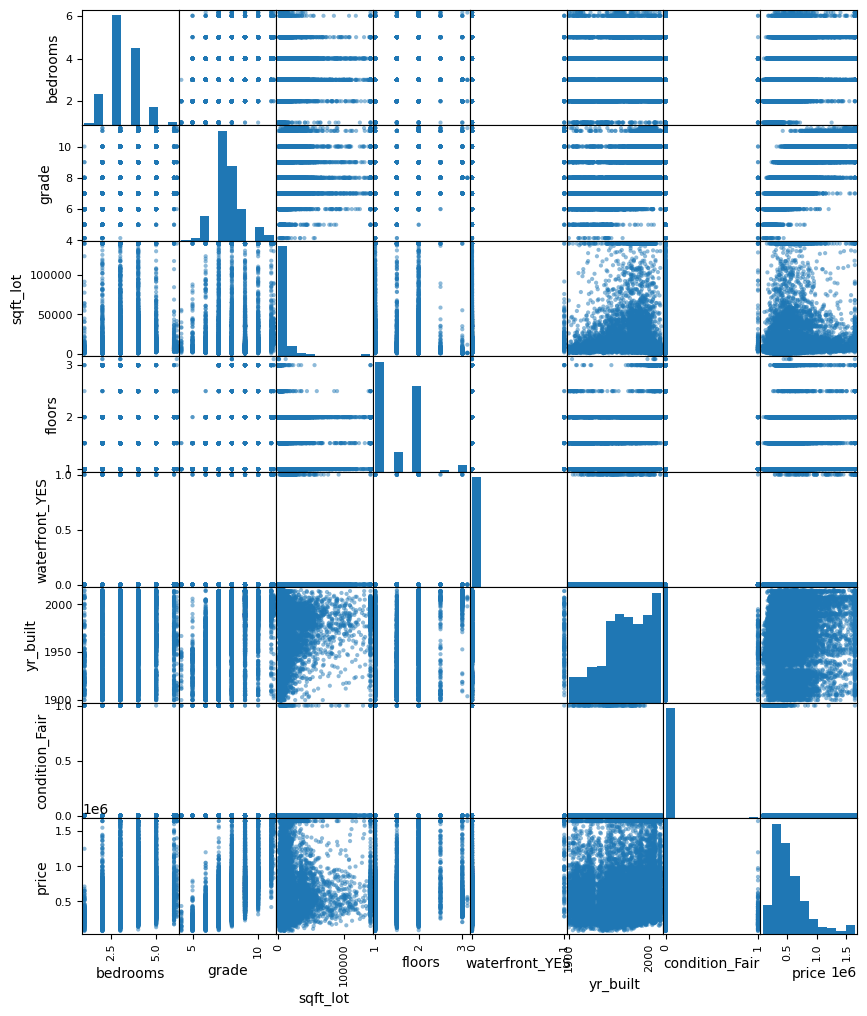

In [55]:
x_cols = ['bedrooms', 'grade', 'sqft_lot', 'floors','waterfront_YES','yr_built', 'condition_Fair','price']
# Convert boolean columns to numeric values for scatter matrix
encoded_data_numeric = encoded_data[x_cols].astype(np.float64)

# Checking distributions
pd.plotting.scatter_matrix(encoded_data_numeric, figsize=(10, 12));

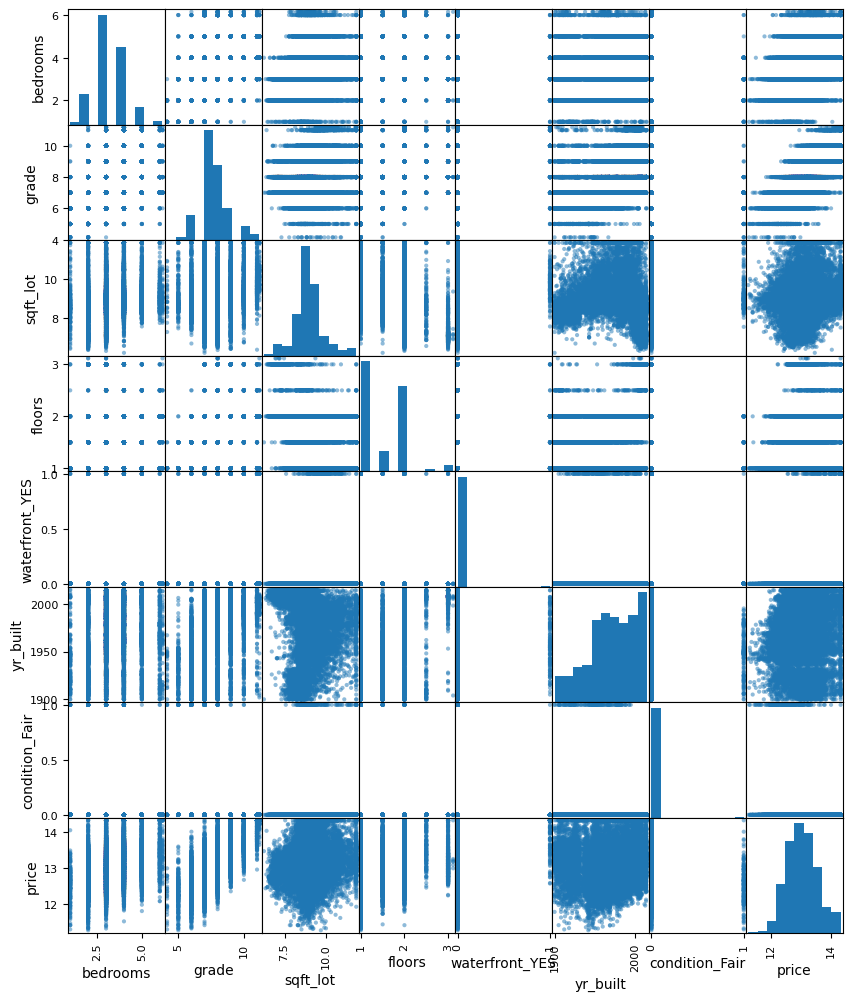

In [56]:
#Tranforming the non normal features this to deal with skewedness which might affect the output of modelling.
non_normal = ['sqft_lot', 'price']
for feat in non_normal:
    encoded_data_numeric[feat] = encoded_data_numeric[feat].map(lambda x: np.log(x))
pd.plotting.scatter_matrix(encoded_data_numeric[x_cols], figsize=(10,12));

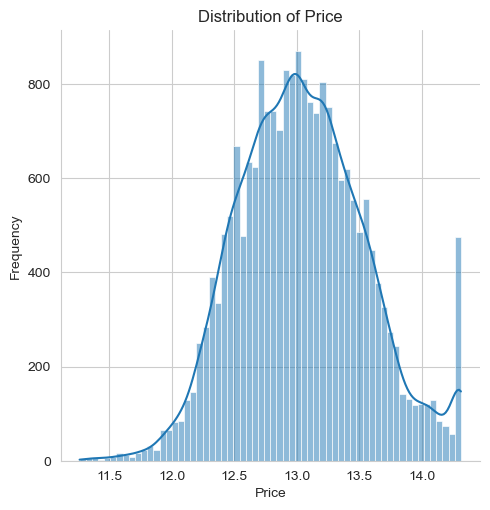

In [57]:
# Set plot style
sns.set_style("whitegrid")

# Create distribution plot
sns.displot(encoded_data_numeric['price'], kde=True)

# Set plot title and labels
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.ylabel("Frequency")

# Show plot
plt.show()

The histogram plot effectively displays the distribution of house prices in the dataset, enabling stakeholders to grasp the range and frequency of different price levels. This plot serves as a valuable tool for gaining insights into the overall distribution of house prices, offering valuable information about market dynamics and potential outliers or skewed distributions. By visually representing the distribution, stakeholders can make well-informed decisions regarding pricing strategies and identify key areas for further analysis. The histogram plot provides a concise and intuitive summary of the 
distribution, facilitating effective data exploration and decision-making.

###  5. DATA MODELLING AND MODEL PERFORMANCE EVALUATION

##### 5.1 SIMPLE LINEAR REGRESSION MODEL WITH GRADE COLUMN AND PRICE 

In [58]:
X = encoded_data['grade'] #independent variable
y = encoded_data['price'] #target variable

In [59]:
#Fitting a linear regression model to predict the 'price' using the feature 'grade'
X = encoded_data[['grade']]
y = encoded_data['price']

lm = LinearRegression()
lm.fit(X,y)
lm.score(X, y)

print('The predicted values are : ' + str(lm.predict(X)))
print('R-sqd for the linear regression model is : ' + str(lm.score(X,y)))

The predicted values are : [408571.14925544 408571.14925544 226065.90377274 ... 408571.14925544
 591076.39473814 408571.14925544]
R-sqd for the linear regression model is : 0.49408349429236


In [60]:
r1 = (lm.score(X,y))
r1

0.49408349429236

In [62]:
# Calculate Mean Squared Error (MSE)
mse_model1 = mean_squared_error(y,lm.predict(X))
print("Mean Squared Error (MSE):", mse_model1)

Mean Squared Error (MSE): 45544434127.926765


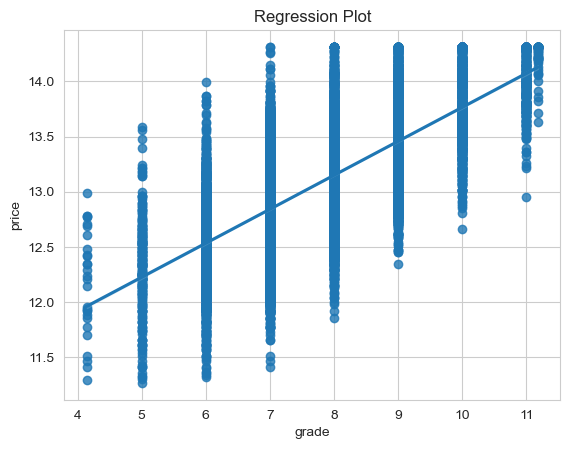

In [63]:
# Create a regression plot
sns.regplot(x='grade', y='price', data=encoded_data_numeric)

# Set the plot title
plt.title("Regression Plot")

# Show the plot
plt.show()

Linear regression for this model consists of price as the target variable and grade as the independent variable in the cleaned dataset. 

The r squared for this model is 0.4941, approximately 49%.

This indicates that the model can effectively predict the price based on the grade/reviews by about 49%.

It suggests that 49% of the variability in the price can be explained by grade/reviews in the regression model.

##### 5.2 MODEL FOR ALL FEATURES AS THE INDEPENDENT VARIABLES

In [64]:
X = encoded_data.drop('price', axis=1)  # Independent variables
y = encoded_data['price']  # Target variable

In [65]:
lm1 = LinearRegression()
lm1.fit(X,y)

print('The predicted values are : ' + str(lm1.predict(X)))
print('R-sqd for the linear regression model is : ' + str(lm1.score(X,y)))

The predicted values are : [397742.07780849 456801.77105529 242652.42656616 ... 244395.31539595
 493384.33461652 247580.30223233]
R-sqd for the linear regression model is : 0.6077160825561031


In [67]:
r2 = lm1.score(X,y)
r2

0.6077160825561031

In [68]:
new_pred = lm1.predict(X)

In [70]:
# Calculate Mean Squared Error (MSE)
mse_model2 = mean_squared_error(y, new_pred)
print("Mean Squared Error (MSE):", mse_model2)

Mean Squared Error (MSE): 35314817437.075806


In [71]:
coefficients = lm1.coef_
coefficients

array([-1.66344831e-06,  3.00816767e+04,  2.63089148e-01,  4.44228634e+04,
        2.00299538e+05, -3.25707329e+03, -2.54407337e+04,  1.45088575e+04,
        4.06458140e+04,  6.89684990e+04,  4.58638638e+05])

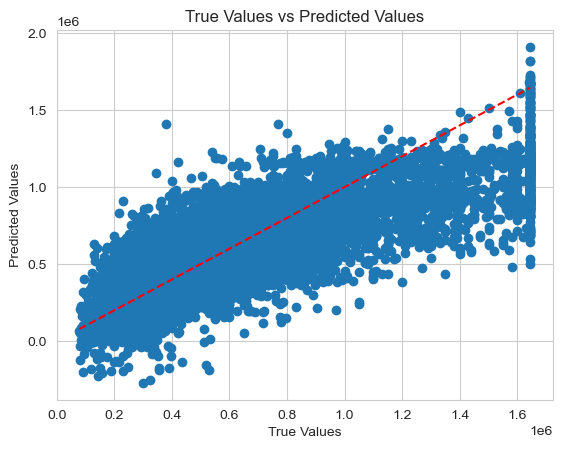

In [72]:
# Plot true values vs predicted values

plt.scatter(y, new_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True Values vs Predicted Values")

# Add linear regression line
line = np.linspace(min(y), max(y), num=100)
plt.plot(line, line, color='red', linestyle='--')

plt.show()

Linear regression for this model consists of all the feature variables in the cleaned dataset. 

The r squared for this model is 0.6077, approximately 61%.

This indicates that the model can effectively predict the dependent variable based on the independent variables by about 61%.

It suggests that 61% of the variability in the price can be explained by all the feature variables/ independent variables in the regression model.

##### 5.3 MODEL FOR THE TOP FIVE FEATURES IN THE DATASET

In [73]:
X_all = encoded_data.drop(['price','id'], axis=1)  # Independent variables
y = encoded_data['price'] #target variable

In [74]:
X_all

,bedrooms,sqft_lot,floors,grade,yr_built,condition_Fair,condition_Good,condition_Poor,condition_Very Good,waterfront_YES
0,3.0,5650.0,1.0,7.0,1955,False,False,False,False,False
1,3.0,7242.0,2.0,7.0,1951,False,False,False,False,False
2,2.0,10000.0,1.0,6.0,1933,False,False,False,False,False
3,4.0,5000.0,1.0,7.0,1965,False,False,False,True,False
4,3.0,8080.0,1.0,8.0,1987,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
21592,3.0,1131.0,3.0,8.0,2009,False,False,False,False,False
21593,4.0,5813.0,2.0,8.0,2014,False,False,False,False,False
21594,2.0,1350.0,2.0,7.0,2009,False,False,False,False,False
21595,3.0,2388.0,2.0,8.0,2004,False,False,False,False,False


In [75]:
# Convert the 'col1' column from string to float
X_all['bedrooms'] = X_all['bedrooms'].astype(float)

# Verify the data types
print(df.dtypes)

cc    float64
dtype: object


In [76]:
selector = SelectKBest(f_regression, k=5)  # Select the top 5 features
X_new_all= selector.fit_transform(X_all, y)
selected_features2 = X_all.columns[selector.get_support()]

In [77]:
selected_features2

Index(['bedrooms', 'sqft_lot', 'floors', 'grade', 'waterfront_YES'], dtype='object')

In [78]:
# Filter out non-numerical feature names from selected_features2
selected_features2_numeric = [col for col in selected_features2 if col in X.columns]

# Train the linear regression model using the selected features
model = LinearRegression()
model.fit(X[selected_features2_numeric], y)

LinearRegression()

In [79]:
# Apply feature selection to the original feature matrix X
X_selected = X[selected_features2]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Convert NumPy arrays to DataFrames
X_train_df = pd.DataFrame(X_train, columns=X_selected.columns)
X_test_df = pd.DataFrame(X_test, columns=X_selected.columns)

In [81]:
lm = LinearRegression()
lm.fit(X_train_df, y_train)

# Make predictions on the test set
y_pred = lm.predict(X_test_df)

# Calculate Mean Squared Error (MSE)
mse_model3 = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse_model3)

# Calculate R-squared score
r3 = r2_score(y_test, y_pred)
print("R-squared score:", r3)

Mean Squared Error (MSE): 43824370063.79458
R-squared score: 0.4983777598665008


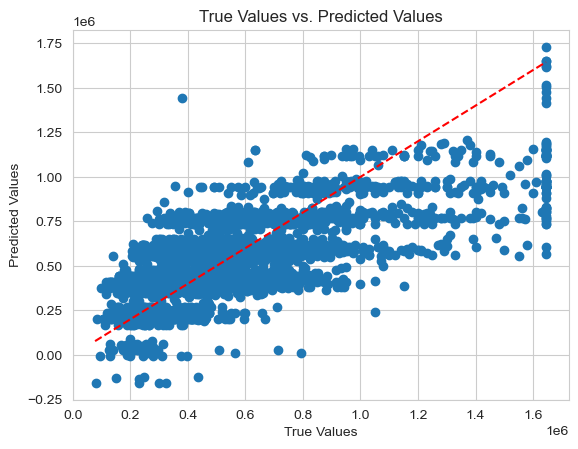

In [82]:
y_pred = model.predict(X_test_df)  # Make predictions on the test set
y_pred = np.array(y_pred)  # Convert to NumPy array if not already
y_test = np.array(y_test)  # Convert to NumPy array if not already

plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True Values vs. Predicted Values")

# Add linear regression line
line = np.linspace(min(y), max(y), num=100)
plt.plot(line, line, color='red', linestyle='--')

plt.show()

Linear regression for this model consists of the top 5 feature variables in the dataset. 

The r squared for this model is 0.4983, approximately 50%.

This indicates that the model can effectively predict the dependent variable based on the independent variables by about 50%.

It suggests that 50% of the variability in the price can be explained by the top 5 feature variables in the regression model.

### 6. MODEL INTERPRETATION

####  6.1 Interpretation of the models

Upon evaluating linear regression models, it is essential to compare their performance and select the final model based on the 

most favorable evaluation metrics. 

I have used to 2 metrics: r squared and mean squared error for the models.

  - **R squared** -A higher R-squared value is generally preferred for a good model as it represents  the proportion of the    
  
    dependent variable's variance that is explained by the independent variables in the regression model, that is, it indicates 
    
    that the model explains all the variability of the dependent variable.

  - **Mean squared error** -It measures the average squared difference between the predicted and actual values of the dependent  
    variable. A lower MSE indicates that the model has smaller prediction errors and is better at fitting the data.

**6.1.1 Visualization of R squared and MSE for the 3 models**

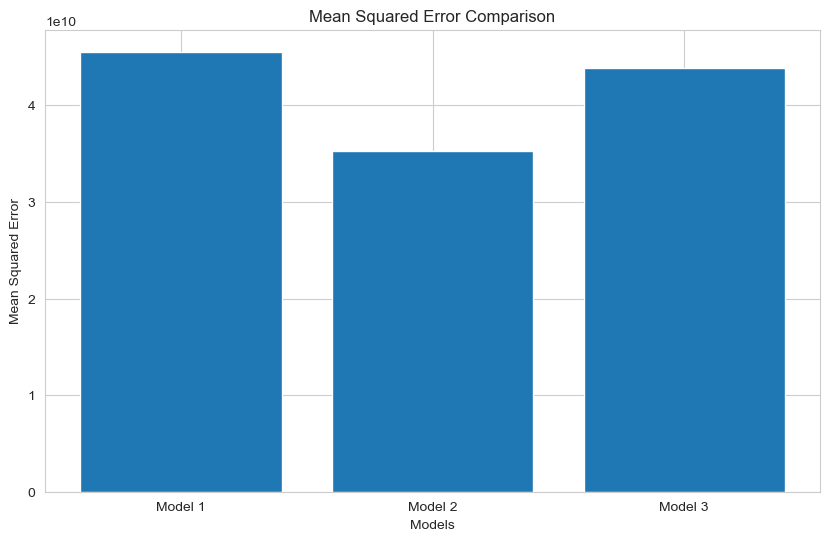

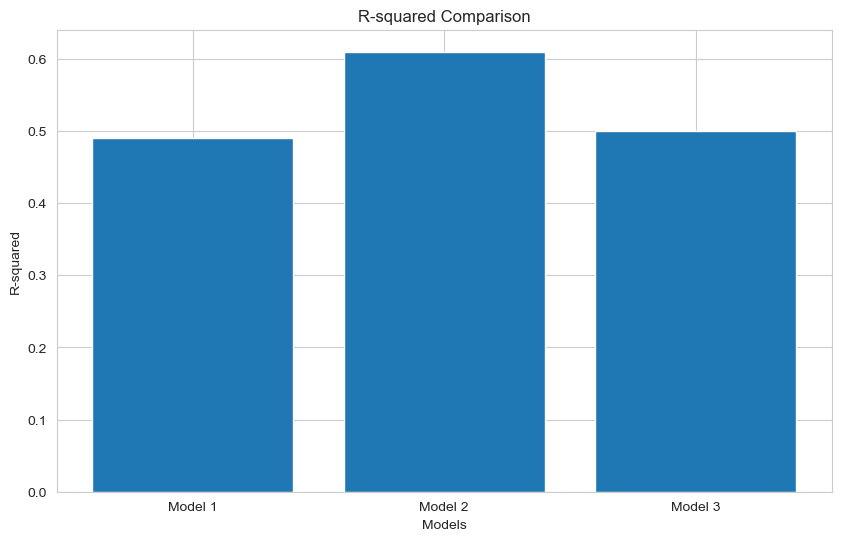

In [83]:
model_names = ['Model 1', 'Model 2', 'Model 3']
mse_scores = [45544434128, 35314817437, 43824370064]  # Replace with actual MSE scores
r2_scores = [0.49, 0.61, 0.50]  # Replace with actual R-squared scores

plt.figure(figsize=(10, 6))
plt.bar(model_names, mse_scores)
plt.title('Mean Squared Error Comparison')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(model_names, r2_scores)
plt.title('R-squared Comparison')
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.show()

After careful evaluation, I have selected the 2nd model as the preferred choice. This decision is based on several factors, 

including its lower MSE (Mean Squared Error) and higher R-squared value compared to all other models. The lower MSE indicates 

that the 2nd model's predictions are closer to the actual values, reflecting its improved accuracy. Additionally, the higher R-

squared value indicates that a larger proportion of the variance in the dependent variable is explained by the 2nd model. 

Overall, these performance metrics suggest that the 2nd model provides a better fit to the data and is more capable of capturing 

the underlying patterns and relationships. 


The model's performance is suboptimal, as indicated by an R-squared value of 0.6077. This means that only 61% of the variation 

in price is explained by the model.

### 7. CONCLUSION AND RECOMMENDATIONS

**7.1 Conclusion**

- Stakeholders should leverage multiple housing renovation features to positively impact housing prices. By incorporating a variety of desirable renovation elements, such as high-quality materials, modern design elements, energy-efficient upgrades, and functional layouts, stakeholders can enhance the perceived value of properties and potentially command higher housing prices. It is important to consider a comprehensive approach to renovations, taking into account the preferences and demands of potential buyers or renters, market trends, and the overall quality and attractiveness of the renovated properties.

**7.2 Recommendations**

- I would recommend that stakeholders consider incorporating many housing features that have a significant impact on  renovations. These features may include renovation grade/reviews, renovation floors, and other relevant factors. By considering these aspects, stakeholders can gain a comprehensive understanding of the renovation landscape and make informed decisions about the most effective strategies for enhancing the value of their properties.
  
- Conducting surveys to capture clients' preferences regarding renovations related to the business problem can provide valuable insights. By actively seeking feedback from potential buyers or renters, stakeholders can better understand their specific renovation preferences, priorities, and expectations.  